## Project Objective

The objective of this project is to leverage data analytics and machine learning techniques to predict customer churn for a financial institution. By identifying the key factors influencing customer attrition and predicting the likelihood of churn.

## Importing Libraries

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Loading the Bank dataset

In [167]:
data = pd.read_csv('Bank Customer Churn Prediction.csv')

## Summary details of the dataset

In [168]:
print(data.head())

   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


In [169]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None


In [170]:
print(data.describe())

        customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.4

## Checking Missing values and duplicates

In [171]:
dp = data.duplicated().sum() # dp-duplicate
print(f"\nDuplicated rows : {dp}")

msv = data.isnull().sum() # msv-missing values
print("\nMissing Values in the columns:\n", msv)


Duplicated rows : 0

Missing Values in the columns:
 customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


## Dropping a column

In [172]:
print(data.columns)

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')


In [173]:
data = data.drop(['customer_id'], axis = 1)

## Exploratory Data Analysis

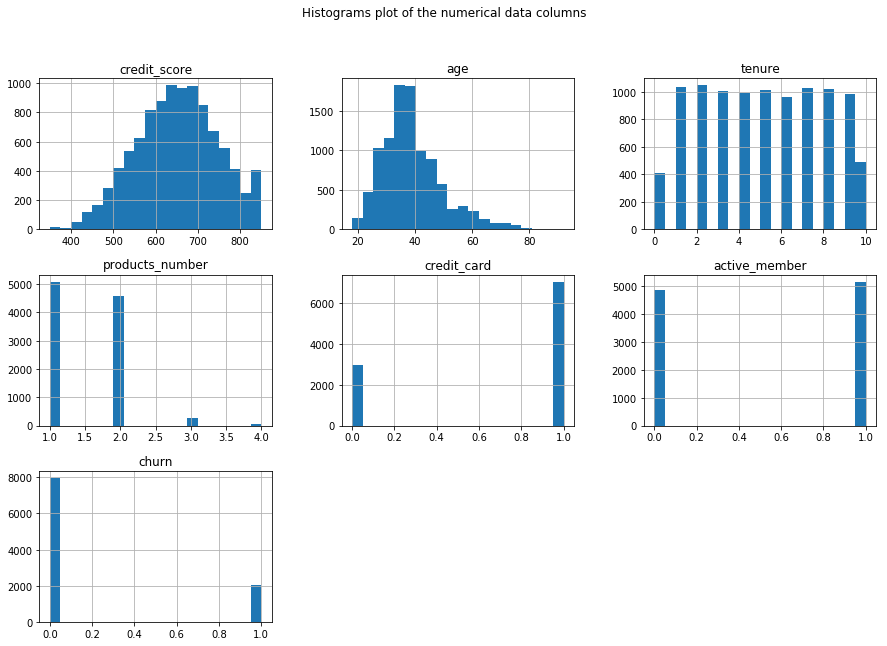

In [174]:
# Plotting Histogram for the numerical data columns

num_cols = data.select_dtypes(include=['int64']).columns
data[num_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms plot of the numerical data columns")
plt.show()

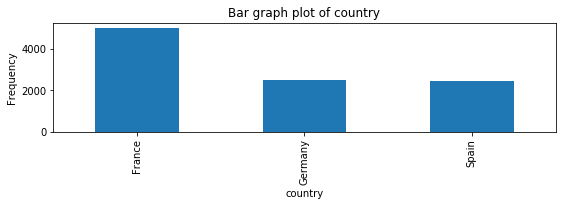

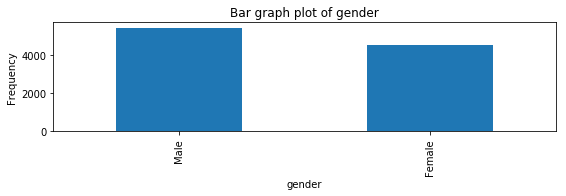

In [175]:
# Plotting Bar graphs for the categorical data columns
catg_cols = data.select_dtypes(include=['object']).columns
for col in catg_cols:
    data[col].value_counts().plot(kind='bar', figsize=(9, 2))
    plt.title(f"Bar graph plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

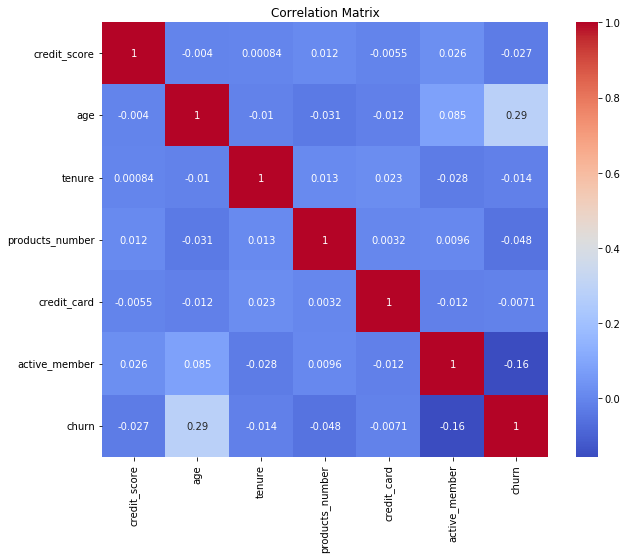

In [176]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr_mtx = data[num_cols].corr()
sns.heatmap(corr_mtx, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [177]:
# Encode categorical variables
le = LabelEncoder()
for column in catg_cols:
    data[column] = le.fit_transform(data[column])

In [178]:
# Define features (X) and target variable (y)
X = data.drop(columns=['churn'])  # Drop the target column
y = data['churn']

## Splitting the set

In [179]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [180]:
# Feature Scaling

# Apply StandardScaler
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# Display the scaled DataFrame
data.head()


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,-0.326221,0,0,0.293517,-1.041760,0.00,-0.911583,0.646092,0.970243,101348.88,1.977165
1,-0.440036,2,0,0.198164,-1.387538,83807.86,-0.911583,-1.547768,0.970243,112542.58,-0.505775
2,-1.536794,0,0,0.293517,1.032908,159660.80,2.527057,0.646092,-1.030670,113931.57,1.977165
3,0.501521,0,0,0.007457,-1.387538,0.00,0.807737,-1.547768,-1.030670,93826.63,-0.505775
4,2.063884,2,0,0.388871,-1.041760,125510.82,-0.911583,0.646092,0.970243,79084.10,-0.505775


## Model training

## Logistic Regression Model

In [182]:
# Train
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predictions
y_pred = log_model.predict(X_test)

# Evaluate model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.8005
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



## Random Forest Model

In [183]:
# Using advanced algorithms like Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Train 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8645
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



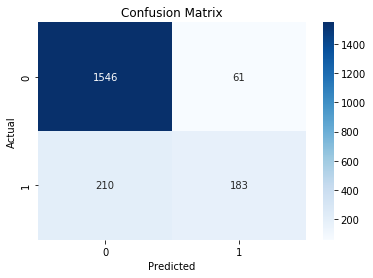

In [184]:
## Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [187]:
from sklearn.metrics import roc_auc_score

log_auc = roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1])
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print("Logistic Regression AUC:", log_auc)
print("Random Forest AUC:", rf_auc)

Logistic Regression AUC: 0.6686570047391264
Random Forest AUC: 0.8569648373607199


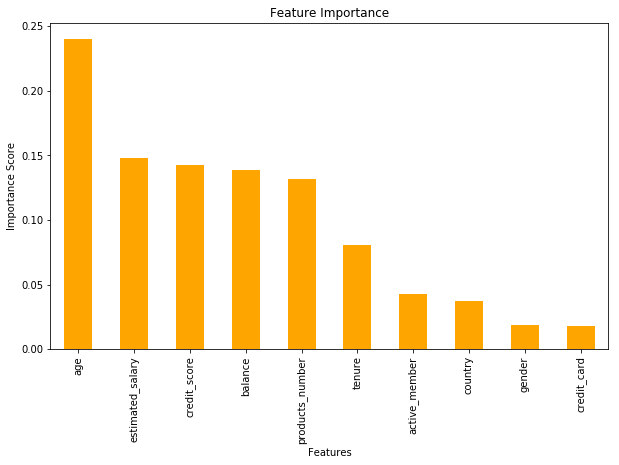


Feature Importance Ranking:
age                 0.240453
estimated_salary    0.148004
credit_score        0.142369
balance             0.138670
products_number     0.132061
tenure              0.080932
active_member       0.042807
country             0.037402
gender              0.019032
credit_card         0.018269
dtype: float64


In [185]:
# Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='orange')
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()


print("\nFeature Importance Ranking:")
print(feature_importances.sort_values(ascending=False))

## Deployment of the Project

In [186]:
import joblib

# Save the Random Forest model
joblib.dump(rf_model, 'churn_model.pkl')

# Save the scaler for preprocessing
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


## Business Insights and Recommendations

1.Customer Segmentation and Targeting:

Focus on at-risk customer segments. For example, young customers or customers with low credit scores and balances.
Apply focused retention campaigns to these segments, highlighting relevant offers such as financial counseling, loyalty programs, or other value-added product sets.

2.Proactive Customer Engagement:

Increase engagement with those customers whose engagement metrics are low, such as fewer products owned or shorter tenure.
Offer incentives or benefits for maintaining or increasing their engagement levels, such as discounts for additional products or rewards for longer tenure.

3.Improve Churn Prediction:

I will perform a balanced approach to handle the class imbalance by using techniques such as oversampling of churners for example, SMOTE or penalize the model in case of misclassification of a churner. Also consider ensemble techniques such as boosting, which will increase the recall for the churners while keeping the overall accuracy intact.

4.Data-Driven Retention Strategies:

Based on the important features identified, create campaigns to target customer segments: Balance-Give incentives in the form of better account benefits for low balance customers. Dynamic churn risk predictions, monitoring feature value changes over time.

5.Business Specific Insights:

Improve relations with less active or inactive members who can easily tend towards churning. Reevaluate service strategies for countries or regions where the churn rate is observed to be high despite the lower impact of the country feature.

6.Feature Importance:

Top reasons for churning are age, estimated salary, credit score, and balance. While features like product number and tenure contribute a lot, gender, credit card ownership, and country contribute minimally.